In [1]:
import json
from collections import Counter
import os

In [22]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
import sys,os
import re
import math
import seaborn as sns

import matplotlib.image as mpimg

In [46]:
#i_s=6
#i_e=63

maps_folder='1_Maps_data'
subj='S01_day_two'
stimulation_file='Stimulation_seq_S01_D2.csv'

maps_folder='1_Maps_data'
subj='S02_day_two'
#stimulation_file='Stimulation_seq_S02_D2.csv'


maps_folder='1_Maps_data'
subj='S02_day_three'
stimulation_file='Stimulation_seq_S02_D3.csv'


maps_folder='1_Maps_data'
subj='S01_day_three'
stimulation_file='Stimulation_seq_S01_D3.csv'

In [47]:

maps_folder='1_Maps_data'
subj='S02_day_two'
stimulation_file='Stimulation_seq_S02_D2.csv'


In [48]:
os.getcwd()

'/Users/gurasog/Desktop/PhD/2_Invasive/2_Vladivostok/0_Maps'

In [49]:
os.chdir(os.getcwd()+'/'+maps_folder+'/'+subj)


In [50]:
import re

In [51]:

files=os.listdir()

In [52]:
os.chdir(os.getcwd()+'/../..')

In [53]:
files

['default_R037_imPixel.yml',
 'default_R034_Rdorsum.png',
 'default_R037_Rpalmar.png',
 '.DS_Store',
 'default_R037_RadioCheckSlider.yml',
 'default_R027_imPixel.yml',
 'default_R032_Rpalmar.png',
 'default_R032_RadioCheckSlider.yml',
 'default_R032_imPixel.yml',
 'default_R027_Rpalmar.png',
 'default_R038_RadioCheckSlider.yml',
 'default_R038_Rpalmar.png',
 'Shit',
 'default_R031_imPixel.yml',
 'default_R031_Rpalmar.png',
 'default_R038_imPixel.yml',
 'default_R040_RadioCheckSlider.yml',
 'default_R039_RadioCheckSlider.yml',
 'default_R028_Rpalmar.png',
 'default_R036_RadioCheckSlider.yml',
 'default_R028_imPixel.yml',
 'default_R033_RadioCheckSlider.yml',
 'default_R034_imPixel.yml',
 'default_R030_RadioCheckSlider.yml',
 'default_R035_RadioCheckSlider.yml',
 'default_R026_Rpalmar.png',
 'default_R033_imPixel.yml',
 'default_R033_Rpalmar.png',
 'default_R026_imPixel.yml',
 'default_R036_Rpalmar.png',
 'default_R028_RadioCheckSlider.yml',
 'default_R027_RadioCheckSlider.yml',
 'defaul

In [54]:
potential_files=set([files[i][13:] for i in range(48)])
potential_files=list(potential_files)

In [55]:
potential_files

['', 'imPixel.yml', 'Rdorsum.png', 'Rpalmar.png', 'RadioCheckSlider.yml']

In [63]:
trial_ids=[]
for i in range(len(files)):
    if files[i] not in ('.DS_Store','Shit'):
        code = int(re.findall('[0-9]+', files[i])[0])
        trial_ids.append(code)

In [64]:
files[i]

'default_R039_Rpalmar.png'

In [65]:
trials=np.sort(list(set(trial_ids)))

In [66]:
maps_folder+subj

'1_Maps_dataS02_day_two'

In [67]:
participants={}
all_inds=[]
for i in trials:
    
    
    if i<10:
        ind='00'+str(i)
    elif i<100:
        ind='0'+str(i)
        
    else:
        ind=str(i)
        
    try:    
        with open(maps_folder+'/'+subj+'/default_R'+ind+'_RadioCheckSlider.yml') as f:

            data = yaml.load(f, Loader=yaml.FullLoader)

            all_inds=all_inds+list(data['Sensation0'].keys())
            participants[i]=data['Sensation0']
    except:
        print(i)

In [68]:
trials

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

In [69]:
stimulation_df=pd.read_csv(maps_folder+'/'+stimulation_file,sep='\t')

In [70]:
stimulation_df[stimulation_df['Image']!='без картинки']['Image'].values

array(['26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40'], dtype=object)

In [71]:
stimulation_df[stimulation_df['Image']=='без картинки']['Image'].values

array(['без картинки', 'без картинки', 'без картинки', 'без картинки',
       'без картинки', 'без картинки'], dtype=object)

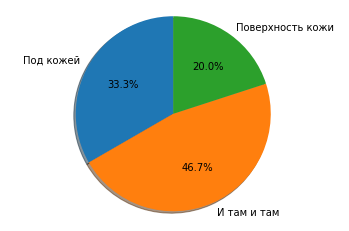

In [72]:

depth_values={}
for p in participants:
    try:
        #print()
        depth_values[p]=participants[p]['depth']
        
    except:
            nothing=2

depth_d=Counter(depth_values.values())

labels = depth_d.keys()
sizes = depth_d.values()
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


(array([1., 0., 0., 1., 2., 4., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

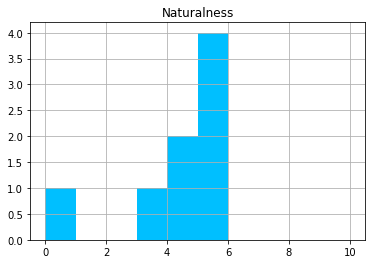

In [73]:
natural_values={}
for p in participants:
    try:
        natural_values[p]=participants[p]['naturalSlider']
    except:
        nothing=2
plt.title('Naturalness')
plt.grid()
plt.hist(natural_values.values(),range=(0,10),color='deepskyblue')

(array([13.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

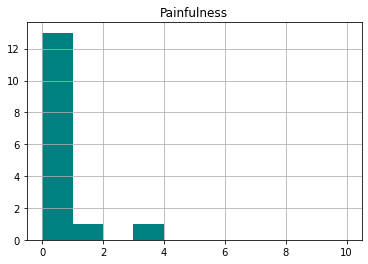

In [74]:
pain_values={}

for p in participants:
    try:
        pain_values[p]=participants[p]['painSlider']
    except:
        nothing=2

plt.title('Painfulness')
plt.grid()
plt.hist(pain_values.values(),range=(0,10),color='teal')

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

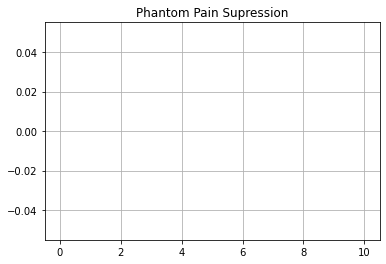

In [75]:
phantom_values={}

for p in participants:
    try:
        phantom_values[p]=participants[p]['phantomSlider']
    except:
        nothing=2

plt.title('Phantom Pain Supression')
plt.grid()
plt.hist(phantom_values.values(),range=(0,10),color='teal')

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

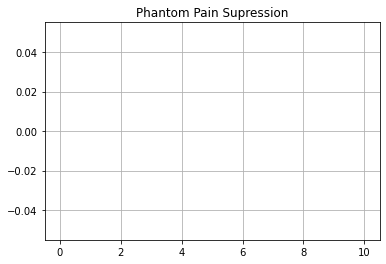

In [76]:
tactile_values={}

for p in participants:
    try:
        tactile_values[p]=participants[p]['phantomSlider']
    except:
        nothing=2

plt.title('Phantom Pain Supression')
plt.grid()
plt.hist(tactile_values.values(),range=(0,10),color='teal')

(array([7., 1., 0., 0., 0., 2., 1., 0., 1., 3.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

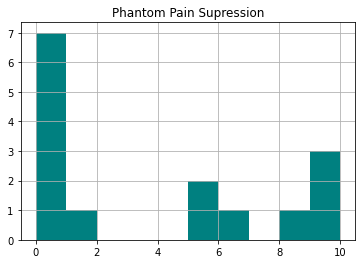

In [77]:
tactile_values={}

for p in participants:
    try:
        tactile_values[p]=participants[p]['motorSlider']
    except:
        nothing=2

plt.title('Phantom Pain Supression')
plt.grid()
plt.hist(tactile_values.values(),range=(0,10),color='teal')

### Анализ изображений

26
Rpalmar.png  ok


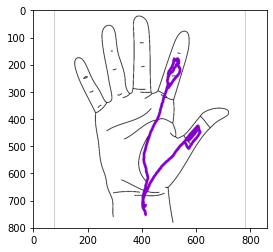

27
Rpalmar.png  ok


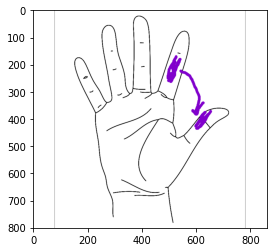

28
Rpalmar.png  ok


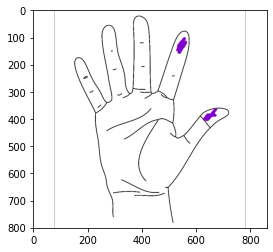

29
Rpalmar.png  ok


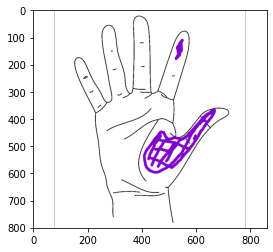

30
Rpalmar.png  ok


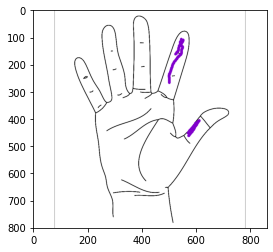

31
Rpalmar.png  ok


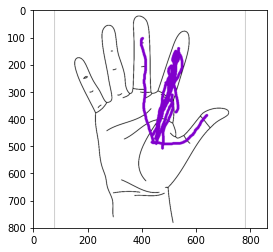

32
Rpalmar.png  ok


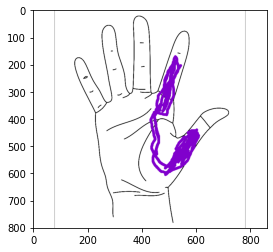

33
Rpalmar.png  ok


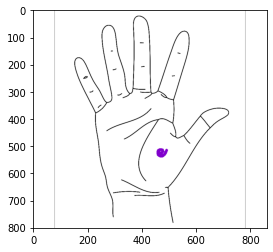

34
Rdorsum.png  ok


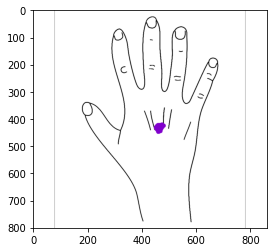

35
Rpalmar.png  ok


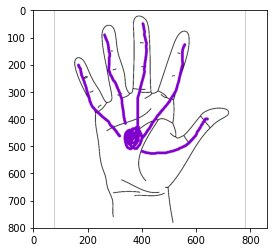

36
Rdorsum.png  ok


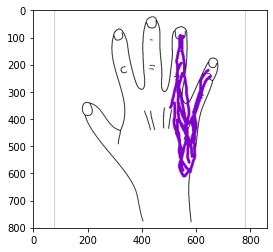

Rpalmar.png  ok


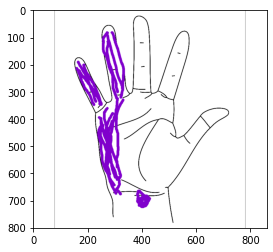

37
Rpalmar.png  ok


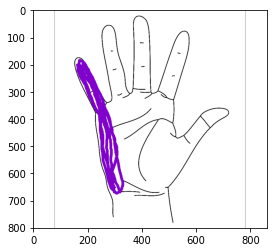

38
Rpalmar.png  ok


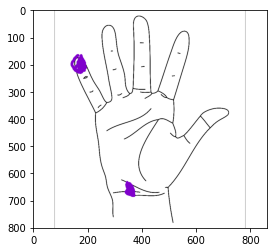

39
Rpalmar.png  ok


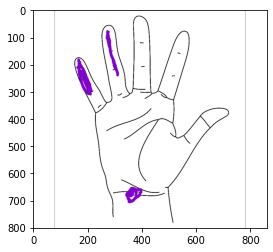

40
Rpalmar.png  ok


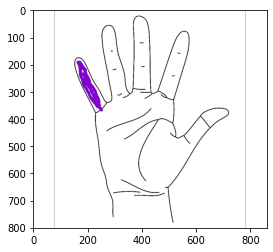

In [86]:
img_list=[]
img_list_barms=[]
img_list_Ldorsum=[]
img_list_Rdorsum=[]
                     
for i in trials:
    print(i)
    
    if i<10:
        ind='00'+str(i)
    elif i<100:
        ind='0'+str(i)
        
    
    for pot in potential_files:
        try:
            img = mpimg.imread(os.getcwd()+'/'+maps_folder+'/'+subj+'/default_R'+ind+'_'+pot)
            print(pot,' ok')
            if pot=='Rpalmar.png':
                img_list.append(img)
            elif pot=='Barms.png':
                img_list_barms.append(img)
            elif pot=='Ldorsum.png':
                img_list_Ldorsum.append(img)
            elif pot=='Rdorsum.png':
                img_list_Rdorsum.append(img)
                
            plt.imshow(img)
            plt.show()


                
        except:
            y=0
        

Размерность  (14, 801, 860, 4)


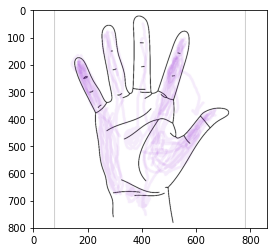

In [80]:
img_array=np.array(img_list)
print('Размерность ', str(img_array.shape))
plt.imshow(np.mean(img_array,0))


Размерность  (2, 801, 860, 4)


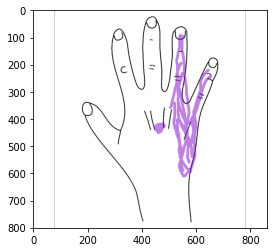

In [83]:
img_array=np.array(img_list_Rdorsum)
print('Размерность ', str(img_array.shape))
plt.imshow(np.mean(img_array,0))

In [147]:
img_list_flatten=[img_list[i].flatten() for i in range(len(img_list))]
from sklearn.decomposition import PCA

pca=PCA(2)
pca_fransforms=pca.fit_transform(img_list_flatten)

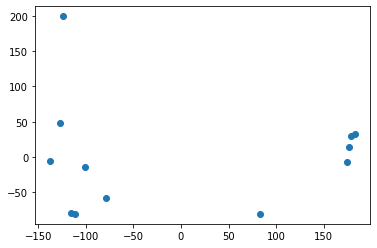

In [98]:

plt.scatter(pca_fransforms[:,0],pca_fransforms[:,1])

In [148]:
from sklearn.cluster import KMeans,SpectralClustering,AgglomerativeClustering

In [100]:
cluster_num=3

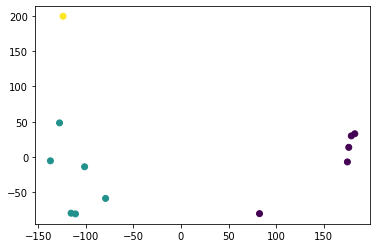

In [101]:
km=AgglomerativeClustering(n_clusters=cluster_num)
clusters=km.fit_predict(pca_fransforms)

plt.scatter(pca_fransforms[:,0],pca_fransforms[:,1],c=clusters)

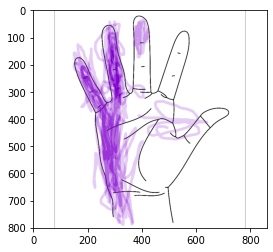

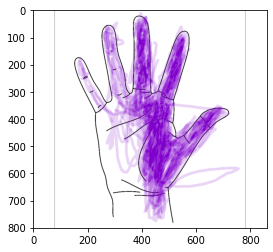

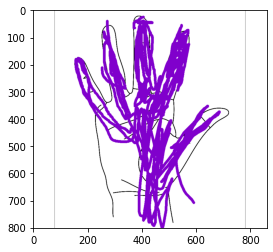

In [102]:
for i in range(cluster_num):

    ind_1=np.where(clusters==i)
    plt.imshow(np.mean(img_array[ind_1],0))
    plt.show()


In [159]:
participants={}
all_inds=[]

all_dicts=[]
ind_list=[]

for i in trials:
    try:
        if i<10:
            ind='00'+str(i)
        elif i<100:
            ind='0'+str(i)

        else:
            ind=str(i)
        with open(maps_folder+'/'+subj+'/default_R'+ind+'_RadioCheckSlider.yml') as f:

            data = yaml.load(f, Loader=yaml.FullLoader)

            all_inds=all_inds+list(data['Sensation0'].keys())
            participants[i]=data['Sensation0']

            all_dicts.append(data['Sensation0'])
            ind_list.append(ind)

    except:
        print(i)

In [160]:
main_df=pd.DataFrame.from_dict(all_dicts,orient='columns')
#main_df['ind']=np.arange(i_s,i_e)
main_df['ind']=ind_list
main_df.head()

,depth,flutterSlider,maintactileSlider,motorSlider,naturalSlider,painSlider,phantomSlider,pressureSlider,pulseSlider,tempSlider,touchSlider,warmSlider,electricSlider,vibrationSlider,urgeSlider,numbSlider,prickSlider,tingleSlider,ind
0,И там и там,5.6,10.0,4.9,1.7,0.0,-0.1,4.8,4.5,3.3,5.8,4.4,NaN,NaN,NaN,NaN,NaN,NaN,005
1,И там и там,NaN,6.2,7.8,4.8,0.0,-0.3,10.0,NaN,2.2,5.7,5.1,5.1,4.5,NaN,NaN,NaN,NaN,007
2,И там и там,NaN,5.0,5.2,1.1,0.0,-0.4,9.7,NaN,1.9,NaN,5.3,6.1,4.8,9.4,NaN,NaN,NaN,008
3,И там и там,NaN,8.9,9.7,1.5,5.2,-0.3,9.4,9.0,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,009
4,И там и там,9.4,0.1,10.0,-4.7,8.4,0.2,9.7,5.1,-0.3,NaN,NaN,5.5,NaN,NaN,NaN,NaN,NaN,010


In [163]:
counts=main_df.copy().drop(['maintactileSlider','naturalSlider','motorSlider','painSlider','phantomSlider','tempSlider','ind'], axis='columns').describe().loc['count']

In [164]:
counts

flutterSlider       8.0
pressureSlider     21.0
pulseSlider         4.0
touchSlider         6.0
warmSlider          4.0
electricSlider     16.0
vibrationSlider    11.0
urgeSlider          2.0
numbSlider         14.0
prickSlider        12.0
tingleSlider        8.0
Name: count, dtype: float64

In [165]:
senses_names=list(counts.index)
senses_values=list(counts.values)
senses_colors=['hotpink','silver','maroon','red','purple','fuchsia','green','lime','olive','navy','teal','yellow'
              ,'sienna','palegreen','darkkhaki']


In [166]:
d_colors={
'flutterSlider':'hotpink',
 'pressureSlider':'silver',
 'pulseSlider':'maroon' ,
 'touchSlider': 'purple',
 'warmSlider': 'fuchsia',
 'electricSlider': 'green',
 'vibrationSlider': 'lime',
 'urgeSlider': 'olive', 
 'numbSlider': 'navy',
 'prickSlider': 'teal',   
'tingleSlider':'yellow',

}

In [167]:
d_ru={
    
'flutterSlider':'Подергивание',
 'pressureSlider':'Сдавливание',
 'pulseSlider':'Пульсация' ,
 'touchSlider': 'Прикосновение',
 'warmSlider': 'Тепло',
 'electricSlider': 'Электрический ток',
 'vibrationSlider': 'Вибрация',
 'urgeSlider': 'Намерение проивзести действие', 
 'numbSlider': 'Онемение',
 'prickSlider': 'Покалывание',   
'tingleSlider':'Пощипывание',
    
}

In [168]:
iii=np.where(np.array(senses_values)>0)[0]

temp_senses_names= np.array(senses_names)[iii]
temp_senses_values=np.array(senses_values)[iii]
temp_colors=np.array([d_colors[temp_senses_names[i]] for i in range(len(temp_senses_names))])
temp_senses_names_ru=np.array([d_ru[temp_senses_names[i]] for i in range(len(temp_senses_names))])

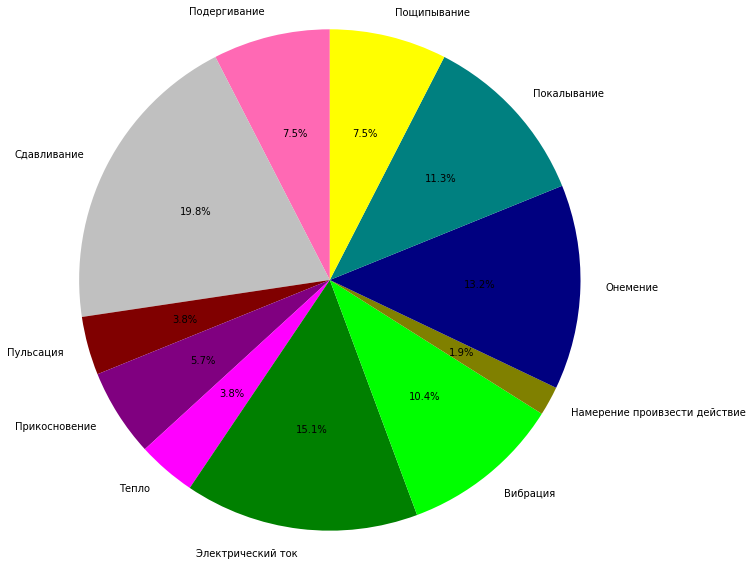

In [169]:

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=[10,10])
ax1.pie(temp_senses_values,  labels=temp_senses_names_ru, autopct='%1.1f%%', colors=temp_colors,
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


### Характеристики стимуляции

In [112]:
stimulation_df=pd.read_csv(maps_folder+'/'+stimulation_file,sep='\t')


In [113]:
stimulation_df_clean=stimulation_df[stimulation_df['Image']!='без картинки'][stimulation_df['Image']!='нет']
len(stimulation_df_clean)

/var/folders/2m/6g8qzjcd00n9j42dqh2ndj780000gn/T/ipykernel_93366/1986649311.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stimulation_df_clean=stimulation_df[stimulation_df['Image']!='без картинки'][stimulation_df['Image']!='нет']


21

In [ ]:
participants={}
all_inds=[]
for i in trials:
    
    
    if i<10:
        ind='00'+str(i)
    elif i<100:
        ind='0'+str(i)
        
    else:
        ind=str(i)
        
    try:    
        with open(maps_folder+'/'+subj+'/default_R'+ind+'_RadioCheckSlider.yml') as f:

            data = yaml.load(f, Loader=yaml.FullLoader)

            all_inds=all_inds+list(data['Sensation0'].keys())
            participants[i]=data['Sensation0']
    except:
        print(i)

In [120]:
participants={}
all_inds=[]

all_dicts=[]
ind_list=[]

for i in trials:
    try:
        if i<10:
            ind='00'+str(i)
        elif i<100:
            ind='0'+str(i)

        else:
            ind=str(i)
        with open(maps_folder+'/'+subj+'/default_R'+ind+'_RadioCheckSlider.yml') as f:

            data = yaml.load(f, Loader=yaml.FullLoader)

            all_inds=all_inds+list(data['Sensation0'].keys())
            participants[i]=data['Sensation0']

            all_dicts.append(data['Sensation0'])
            ind_list.append(ind)

    except:
        print(i)

In [138]:
main_df=pd.DataFrame.from_dict(all_dicts,orient='columns')
#main_df['ind']=np.arange(i_s,i_e)
main_df.index=ind_list


In [141]:
senses_df=main_df.copy().drop(['motorSlider','naturalSlider','painSlider','maintactileSlider','phantomSlider','depth'],axis=1)

In [162]:
#senses_df['pulse_width']=stimulation_df_clean['Pulse_width']
#senses_df['frequency']=stimulation_df_clean['Frequency']


In [187]:
stimulation_df_clean['Pulse_width'].values.astype('str')

array(['240', '240', '60', '480', '960', '60', '480', '480', '960', '240',
       '480', '60', '960', '960', '120', '240', '60', '960', '60', '60',
       '240', '240', '60', '480', '960', '60', '480', '480', '120', '960',
       '240', '480', '120', '240', '480', '960', '960', '480', '120',
       '240', '240', '120', '960', '60', '240', '120', '60', '60'],
      dtype='<U21')

In [168]:
main_df_t=senses_df.apply(lambda x: [0 if math.isnan(x[i]) else 1 for i in range(len(x))])

In [192]:
main_df_t['pulse_width']=stimulation_df_clean['Pulse_width']

In [189]:
main_df_t['pulse_width']=stimulation_df_clean['Pulse_width']

In [196]:
main_df_t['pulse_width']=np.sqrt(stimulation_df_clean['Pulse_width'].values)
main_df_t['frequency']=np.sqrt(stimulation_df_clean['Frequency'].values)

In [195]:
sns.swarmplot?

/Users/gurasog/anaconda3/envs/invasive/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurasog/anaconda3/envs/invasive/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurasog/anaconda3/envs/invasive/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

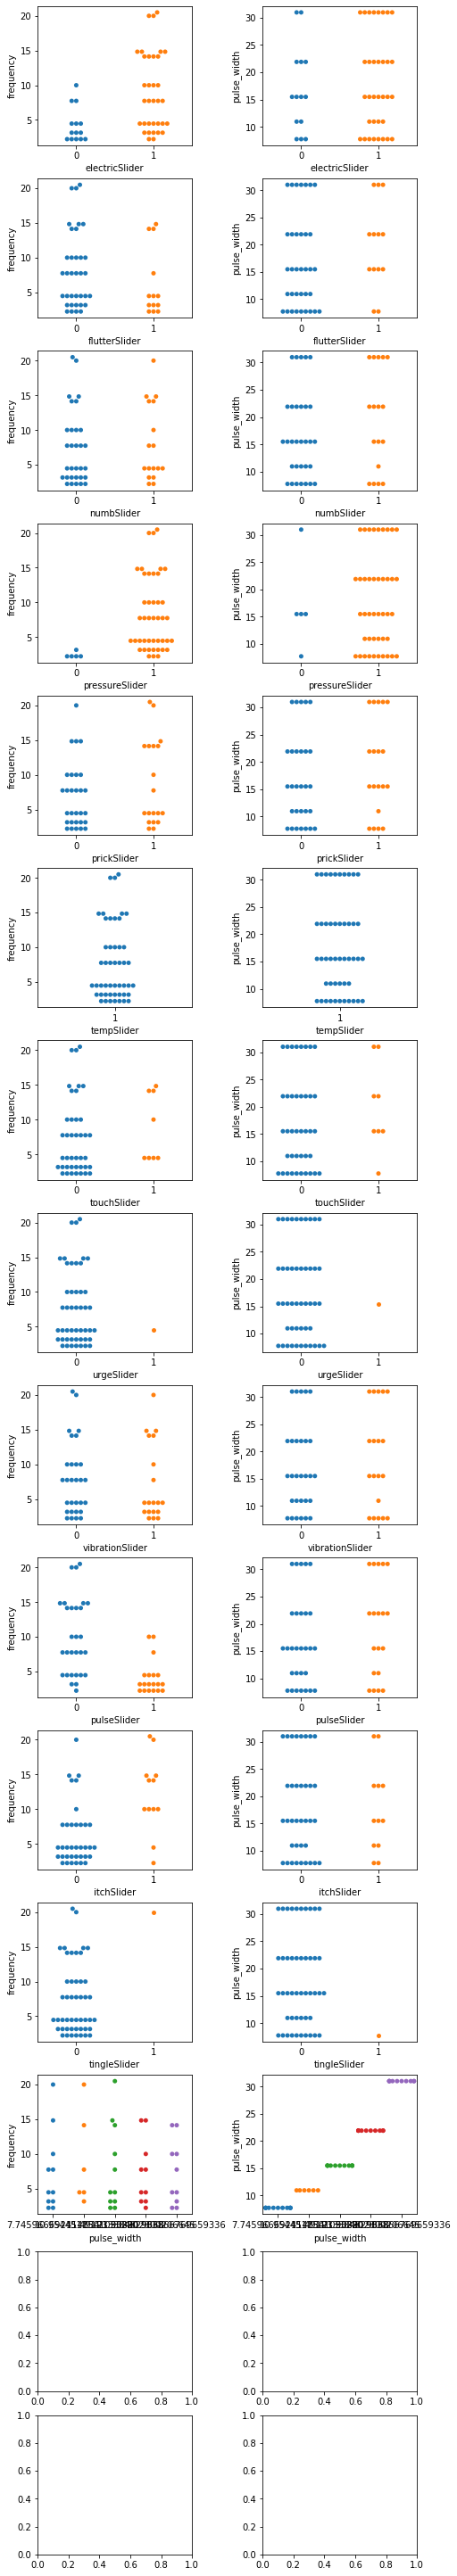

In [197]:

fig,axs=plt.subplots(15,2, figsize=(7,40),constrained_layout = True)

for i in range(13):
    #sns.swarmplot(main_df_t[main_df_t.columns[i]],main_df['duration'],ax=axs[0,i])
    sns.swarmplot(main_df_t[main_df_t.columns[i]],main_df_t['frequency'],ax=axs[i,0])
    sns.swarmplot(main_df_t[main_df_t.columns[i]],main_df_t['pulse_width'],ax=axs[i,1])
    

#axs[0,1]=sns.swarmplot(loool,main_df['depth'])
#axs[0,1]=sns.swarmplot(loool,main_df['frequenc'])
#axs.show()

In [211]:
main_df_t[['pulse_width','frequency','touchSlider']].

,pulse_width,frequency,touchSlider
067,15.491933,4.472136,1
068,15.491933,3.162278,0
069,7.745967,7.745967,0
070,21.908902,3.162278,0
071,30.983867,2.236068,0
072,7.745967,4.472136,0
073,21.908902,7.745967,0
074,21.908902,14.832397,0
075,30.983867,14.142136,1
076,15.491933,2.236068,0


In [207]:
main_df_t[main_df_t['touchSlider','pulse_width']]

KeyError: ('touchSlider', 'pulse_width')